In [1]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Clean data path
clean_data_path = "../data/games_clean.csv"

In [3]:
# Default figure size
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

In [4]:
# Dataframe with Pandas
chess_df = pd.read_csv(clean_data_path)
chess_df

,rated,turns,victory_status,winner,time,white_rating,black_rating,opening_eco,opening_name,opening_ply
0,True,16,resign,black,5+10,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
1,True,61,mate,white,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,3
2,True,61,mate,white,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3
3,True,95,mate,white,30+3,1523,1469,C41,Philidor Defense,5
4,True,33,resign,white,10+0,1520,1423,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
...,...,...,...,...,...,...,...,...,...,...
16150,True,24,resign,white,10+10,1691,1220,A80,Dutch Defense,2
16151,True,82,mate,black,10+0,1233,1196,A41,Queen's Pawn,2
16152,True,35,mate,white,10+0,1219,1286,D00,Queen's Pawn Game: Mason Attack,3
16153,True,109,resign,white,10+0,1360,1227,B07,Pirc Defense,4


In [5]:
# rating average
chess_df['rating_diff'] = np.abs(chess_df['white_rating'] - chess_df['black_rating'])

In [6]:
X = chess_df['turns'].values.reshape(-1,1)
y = chess_df['rating_diff'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lin_regression = linear_model.LinearRegression()
lin_regression.fit(X_train, y_train)

y_pred = lin_regression.predict(X_test)

print('Coefficient: ', lin_regression.coef_[0][0])
print('Intercept: ', lin_regression.intercept_[0])
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

Coefficient:  -0.5382351811089695
Intercept:  187.1987142605343
Mean squared error:  22744.6593754891
R2:  0.01852884511577335


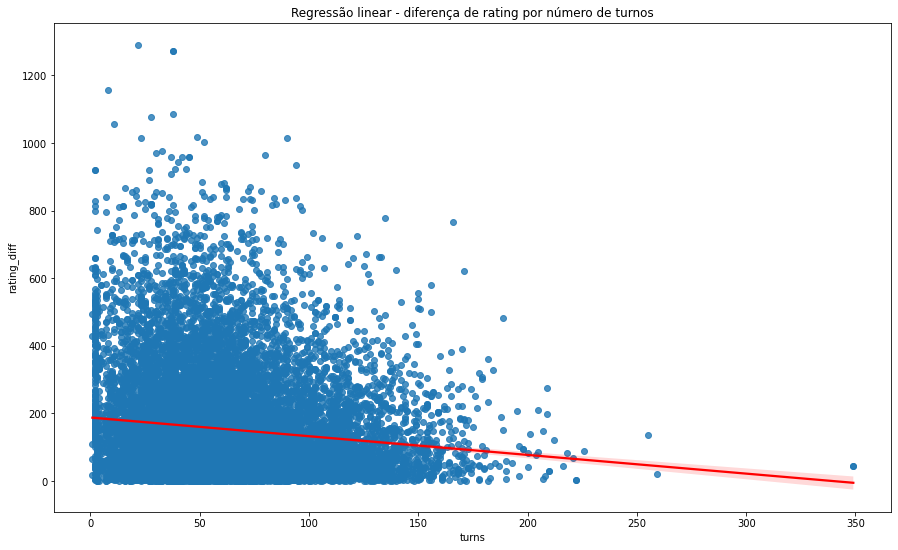

In [7]:
sns.regplot(x='turns', y='rating_diff', data=chess_df, line_kws={"color": "red"})
plt.title('Regressão linear - diferença de rating por número de turnos')
plt.show()